In [2]:
import math

$\frac{H^2}{H_0^2}=\Omega_ra^{-4}+\Omega_ma^{-3}+\Omega_ka^{-2}+\Omega_{\Lambda}$

$H(a)=H_0\sqrt{\Omega_ra^{-4}+\Omega_ma^{-3}+\Omega_ka^{-2}+\Omega_{\Lambda}}$

## $\Omega_r$

$\Omega_r=a_{eq}\Omega_m$, $a_{eq}\approx3400^{-1}$

In [ ]:
aeq = 1 / 3400
omr = aeq * omm

## $\Omega_m$

$\Omega_m = \Omega_b+\Omega_c$

In [ ]:
omm = (ombh2 + omch2) / h**2

## $\Omega_k\approx0$

## $\Omega_\Lambda$

$\Omega_{\Lambda} = 1 - \Omega_r - \Omega_m$

In [ ]:
omlamb = 1 - omm - omr

##  H(a)

In [ ]:
H(a) = H0 * sqrt()

##  Compare quad & trapezoid

In [43]:
import numpy as np
from scipy.integrate import quad, trapezoid
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(a):
    return a**(-1.5)

a_min = 1e-4
a_max = 1.0

### quad

In [8]:
start_quad = time.time()
f_result = quad(f, a_min, a_max)[0]
end_quad = time.time()
print(f"quad:{f_result:.6f}, time: {end_quad - start_quad:.6f} sec")

quad:198.000000, time: 0.000330 sec


### trapezoid

In [9]:
integrate_length = [100, 1000, 10000, 50000, 70000, 100000, 125000, 150000, 160000]
int_result = []
for N in integrate_length:
    x = np.linspace(a_min, a_max, N)
    y = np.array([f(a) for a in x])
    start_trap = time.time()
    result_trap = trapezoid(y, x)
    end_trap = time.time()
    int_result.append(result_trap)
    print(f"trapezoid(N={N}): {result_trap:.6f}, time: {end_trap - start_trap:.6f} sec")

trapezoid(N=100): 5073.797890, time: 0.000393 sec
trapezoid(N=1000): 575.270189, time: 0.000300 sec
trapezoid(N=10000): 209.237535, time: 0.000276 sec
trapezoid(N=50000): 198.497070, time: 0.002703 sec
trapezoid(N=70000): 198.254308, time: 0.000333 sec
trapezoid(N=100000): 198.124796, time: 0.000309 sec
trapezoid(N=125000): 198.079911, time: 0.000250 sec
trapezoid(N=150000): 198.055509, time: 0.000288 sec
trapezoid(N=160000): 198.048791, time: 0.000253 sec


In [10]:
result_err = []
for result in int_result:
    item_error = (result - f_result)/f_result
    result_err.append(item_error)
print(result_err)

[24.625241869482323, 1.9054049946058573, 0.05675522660251929, 0.002510453940233231, 0.001284385082033197, 0.000630284522930572, 0.000403590508263897, 0.0002803499219892113, 0.00024642034703255505]


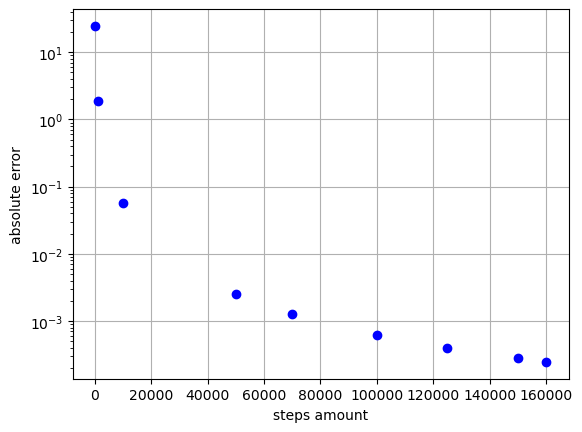

In [46]:
#x = integrate_length
#y = result_err

#def fitting_func(x, a, b):
#    return a / x + b
#popt, pcov = curve_fit(fitting_func, x, y)

#x_smooth = np.linspace(min(x), max(x), 300)
#y_smooth = fitting_func(x_smooth, *popt)

plt.plot(integrate_length, result_err,'bo', label="data points")
#plt.plot(x_smooth, y_smooth, 'r-', label='Fit: a/x + b')

plt.yscale('log')
#plt.ylim(-1, 26)
plt.ylabel("absolute error")
plt.xlabel("steps amount")
plt.grid(True)
plt.show()

In [13]:
result_err_reduced = []

In [62]:
time_array = [None] * len(integrate_length)
i = 0
for i, N in enumerate(integrate_length):
    time_array[i] = []
    
    step_length = (a_max - a_min)/N
    val_low = a_min
    val_up = val_low + step_length
    
    print(f"now in N = {N} ({i+1}/{len(integrate_length)})")
    for j in range(N):
        if val_up > a_max:
            print(f'the last integral range is over and its error is {val_up - a_max}')
        
        x = np.linspace(val_low, val_up, 2)
        y = np.array([f(a) for a in x])
            
        start_trap = time.time()
        item_trap = trapezoid(y, x)
        end_trap = time.time()
            
        time_array[i].append(end_trap - start_trap)
            
        val_low+= step_length
        val_up+= step_length
        
    print(len(time_array[i]))

now in N = 100 (1/9)
100
now in N = 1000 (2/9)
the last integral range is over and its error is 2.5757174171303632e-14
1000
now in N = 10000 (3/9)
the last integral range is over and its error is 2.2426505097428162e-13
10000
now in N = 50000 (4/9)
50000
now in N = 70000 (5/9)
70000
now in N = 100000 (6/9)
100000
now in N = 125000 (7/9)
the last integral range is over and its error is 3.1474822748123188e-12
125000
now in N = 150000 (8/9)
150000
now in N = 160000 (9/9)
the last integral range is over and its error is 2.978728375069295e-12
160000
